<a href="https://colab.research.google.com/github/konarksharma2001/pthon/blob/main/Lab5_(LSM%26_GDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Least Square Error Method

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['target'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


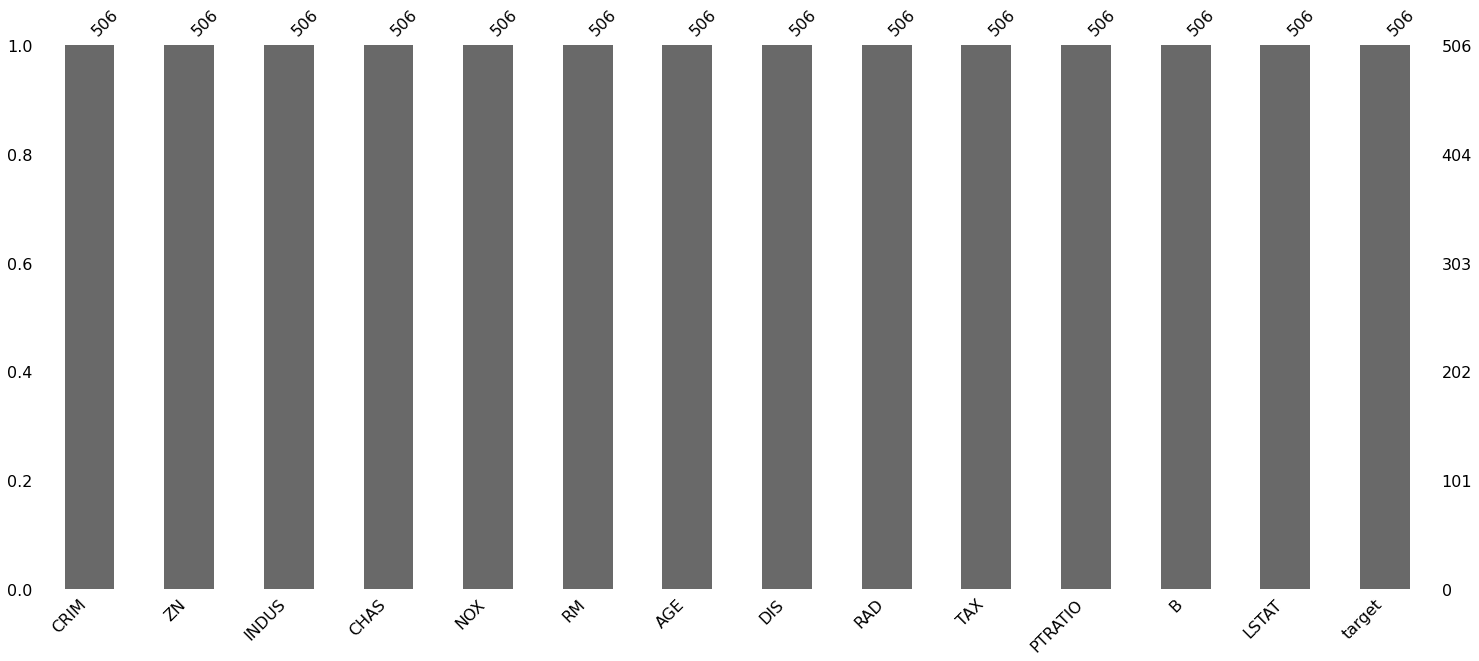

In [2]:
import missingno as ms
ms.bar(df)

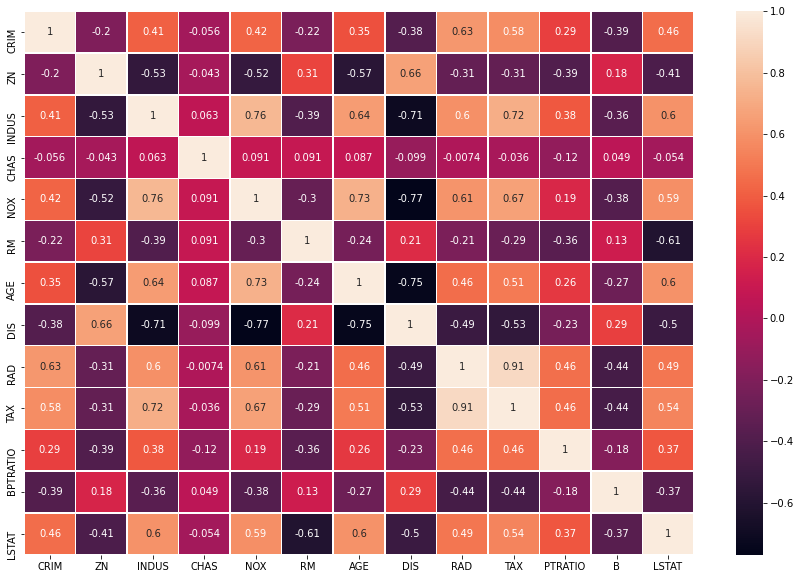

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.iloc[:,0:13].corr(),annot=True, linewidths=.5, ax=ax)


In [4]:
import numpy as np
X=df.iloc[:,0:13]
Y=df.iloc[:,13]
Y=np.array(Y)
Y=Y.reshape(-1,1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.insert(X_scaled, 0, values=1, axis=1)

In [6]:
X_scaled

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 14)
(152, 14)
(354, 1)
(152, 1)


In [9]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[22.50945471]
 [-1.14691411]
 [ 0.83432605]
 [ 0.33940694]
 [ 0.79163612]
 [-1.784727  ]
 [ 2.84783949]
 [-0.30429306]
 [-2.91562521]
 [ 2.11140045]
 [-1.46519951]
 [-1.9696347 ]
 [ 1.07567771]
 [-3.90310727]]


In [11]:
y_predict=X_test.dot(beta)
#print(y_predict)
print(len(y_predict))

152


In [12]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)

21.51744423117728


In [13]:
rms_error=np.sqrt(mean_square_error)
print(rms_error)

4.6386899261728285


In [14]:
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
r_square = 1-sum_square_error/total_variance
print(r_square)

0.7112260057484923


#Gradient Descent Optimization

In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("USA_Housing.csv")
df.head(5)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
X=df.iloc[:,0:5]
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [18]:
y = df.iloc[:,5]
y = np.array(y)
y = y.reshape(-1,1)
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

####Standard Normalization


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [20]:
X_scaled

array([[ 1.        ,  1.02865969, -0.29692705,  0.02127433,  0.08806222,
        -1.31759867],
       [ 1.        ,  1.00080775,  0.02590164, -0.25550611, -0.72230146,
         0.40399945],
       [ 1.        , -0.68462916, -0.11230283,  1.5162435 ,  0.93084045,
         0.07240989],
       ...,
       [ 1.        , -0.48723454,  1.28447022, -2.17026949, -1.50025059,
        -0.29193658],
       [ 1.        , -0.05459152, -0.44669439,  0.14154061,  1.18205319,
         0.65111608],
       [ 1.        , -0.28831272,  0.01521477, -0.19434166,  0.07185495,
         1.04162464]])

###Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##Calculating Beta Vector

In [22]:
beta=np.zeros(6)
number_of_iterations=1000
learning_rate=0.01
n = 5

In [23]:
for i in range(number_of_iterations):
  x0_gradient=0
  x1_gradient=0
  x2_gradient=0
  x3_gradient=0
  x4_gradient=0
  x5_gradient=0
  
for j in range(len(X_train)):
  a=X_train[j,0]
  b=X_train[j,1]
  c=X_train[j,2]
  d=X_train[j,3]
  e=X_train[j,4]
  f=y_train[j]

  x0_gradient+=(beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)
  x1_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*a)
  x2_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*b)
  x3_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*c)
  x4_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*d)
  x5_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*e)
  
  beta[0]=beta[0]-learning_rate/n*x0_gradient
  beta[1]=beta[1]-learning_rate/n*x1_gradient
  beta[2]=beta[2]-learning_rate/n*x2_gradient
  beta[3]=beta[3]-learning_rate/n*x3_gradient
  beta[4]=beta[4]-learning_rate/n*x4_gradient
  beta[5]=beta[5]-learning_rate/n*x5_gradient
print(beta)

[-3.81440828e+09 -3.81440828e+09  1.73425386e+10 -2.19472274e+10
  1.81090639e+10 -1.22054823e+10]


###Predictions

In [24]:
beta=np.array(beta).reshape(-1,1)
print(beta.shape)
y_predict=X_test.dot(beta)
print(y_predict.shape)

(6, 1)
(1500, 1)


In [25]:

y_predict

array([[ 8.56833597e+09],
       [-3.73029171e+09],
       [-4.24440430e+09],
       ...,
       [-2.29267672e+10],
       [-1.64960643e+10],
       [-3.27646123e+10]])

###Metric-based evaluations

In [26]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)

9.88102376986474e+20


In [27]:
rms_error=np.sqrt(mean_square_error)
print(rms_error)

31434095771.732864


In [28]:
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
r_square = (1-sum_square_error/total_variance)
print(rms_error)

31434095771.732864


In [29]:
N = len(y_predict) #N is the total sample size
k = 5              #k is the number of predictors
adj_r_sq = 1-(((1-r_square)*(N-1))/(N-k-1))
print(adj_r_sq)

-8401038521.630934
